# beta estimation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### tcpnewreno

In [13]:
os.chdir('tcp-dumbbell-regular-tcpnewreno/')

for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        # print()
        plt.plot(d[:, 0], d[:, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestiomn Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'tcp-dumbbell-regular-tcpnewreno/'

## tcplinuxreno

In [14]:
# Variables
folder_path = '/home/jack/github/mtp/pythonWork/tcp-dumbbell-regular-tcplinuxreno/'

### PoC

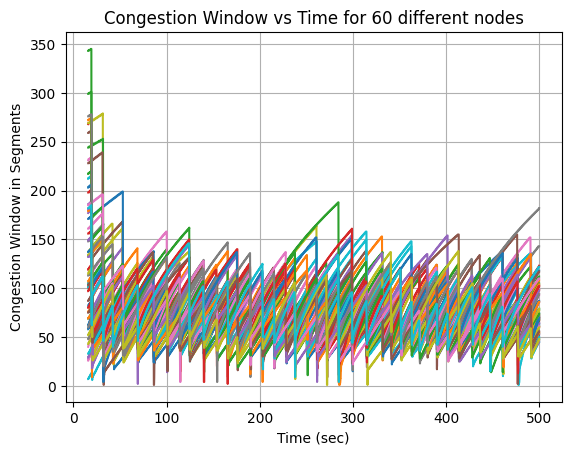

In [16]:
os.chdir(folder_path)
for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        plt.plot(d[:, 0], d[:, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()

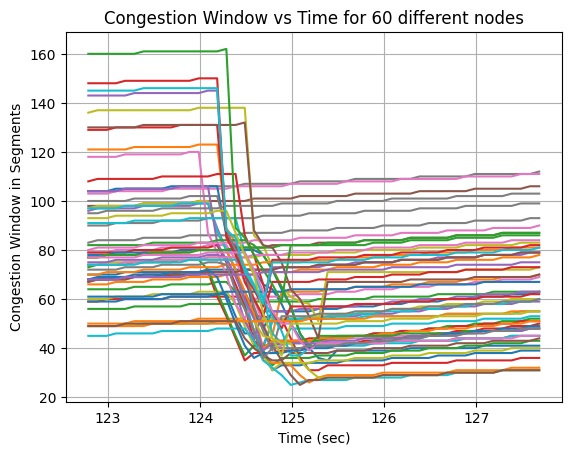

In [17]:
os.chdir(folder_path)
data_to_n = []
for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        li = 1070
        hi = 1120
        data_to_n.append(d[li:hi, 1])
        plt.plot(d[li:hi, 0], d[li:hi, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()

In [18]:
data_to_n = np.array(data_to_n)
data_to_n

array([[ 70.,  70.,  70., ...,  41.,  41.,  41.],
       [121., 121., 121., ...,  69.,  69.,  70.],
       [ 64.,  64.,  64., ...,  42.,  43.,  43.],
       ...,
       [ 72.,  72.,  72., ...,  48.,  48.,  48.],
       [ 93.,  93.,  93., ...,  54.,  55.,  55.],
       [145., 145., 145., ...,  80.,  80.,  81.]], shape=(60, 50))

In [19]:
data_loss = np.zeros(data_to_n.shape)

# convert it into loss events
for i in range(len(data_to_n)):
    for j in range(1, len(data_to_n[i])):
        if(data_to_n[i][j-1] > data_to_n[i][j]):
            data_loss[i][j] = 1

In [20]:
# global sync
nij = 0
flows_that_are_lossing = []
for i in range(len(data_loss)):
    for j in range(len(data_loss[i])):
        if(data_loss[i][j] == 1):
            flows_that_are_lossing.append(i)
            nij+=1
            break
sync_rate = nij/len(data_loss)
sync_rate

0.6666666666666666

In [21]:
loss_data = []
for i in flows_that_are_lossing:
    loss_data.append(data_to_n[i])
loss_data = np.array(loss_data)
loss_data

array([[ 70.,  70.,  70., ...,  41.,  41.,  41.],
       [121., 121., 121., ...,  69.,  69.,  70.],
       [ 64.,  64.,  64., ...,  42.,  43.,  43.],
       ...,
       [ 72.,  72.,  72., ...,  48.,  48.,  48.],
       [ 93.,  93.,  93., ...,  54.,  55.,  55.],
       [145., 145., 145., ...,  80.,  80.,  81.]], shape=(40, 50))

In [22]:
w_star = []
for i in range(len(loss_data[0])):
    w = 0
    for j in range(len(loss_data)):
        w += loss_data[j][i]
    w_star.append(w/len(loss_data))
w_star = np.array(w_star)
w_star

array([89.875, 90.025, 90.1  , 90.325, 90.55 , 90.775, 90.975, 91.05 ,
       91.2  , 91.375, 91.55 , 91.675, 91.9  , 91.15 , 89.15 , 79.925,
       73.475, 66.1  , 57.525, 51.85 , 50.95 , 50.   , 49.75 , 48.275,
       47.625, 47.575, 48.85 , 49.15 , 49.3  , 49.6  , 49.775, 49.95 ,
       50.175, 50.5  , 50.75 , 51.   , 51.1  , 51.375, 51.575, 51.8  ,
       52.1  , 52.3  , 52.55 , 52.85 , 52.925, 53.2  , 53.45 , 53.65 ,
       53.9  , 54.15 ])

In [23]:
# first loss events
fr = 0
for i in range(1, len(w_star)):
    if(w_star[i] < w_star[i-1]):
        fr = w_star[i]
        break

In [24]:
fr

np.float64(91.15)

In [25]:
# last loss events
lt = 0
for i in range(len(w_star)-1, 0, -1):
    if(w_star[i] < w_star[i-1]):
        lt = w_star[i]
        break
        

In [26]:
lt

np.float64(47.575)

In [27]:
beta = (fr-lt)/fr
beta

np.float64(0.4780581459133297)

as we see this beta value is close to 0.5

## Across whole data

In [28]:
# variables
window_size = 25 # left 25 and right 25 => total 50 i.e 5 seconds


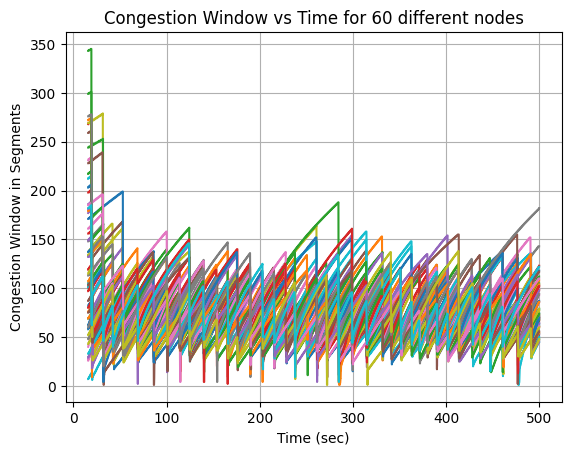

In [29]:
os.chdir(folder_path)
data_to_n = []
for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        data_to_n.append(d[:, 1])
        plt.plot(d[:, 0], d[:, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()

In [30]:
data_to_n = np.array(data_to_n)
data_to_n

array([[ 82.,  83.,  83., ...,  73.,  73.,  74.],
       [ 27.,  28.,  28., ..., 108., 108., 108.],
       [133., 133., 133., ...,  60.,  61.,  61.],
       ...,
       [276., 276., 276., ..., 181., 181., 182.],
       [115., 116., 116., ...,  47.,  47.,  48.],
       [182., 182., 182., ..., 122., 122., 122.]], shape=(60, 4843))

In [31]:
data_loss = np.zeros(data_to_n.shape)

# convert it into loss events
for i in range(len(data_to_n)):
    for j in range(1, len(data_to_n[i])):
        if(data_to_n[i][j-1] > data_to_n[i][j]):
            data_loss[i][j] = 1

In [32]:
# global sync
sync_rate = []
for k in range(len(data_loss[0])):
    nij = 0
    low = max(0, k-window_size)
    high = min(k+window_size+1, len(data_loss[0]))
    for i in range(len(data_loss)):
        for j in range(low, high):
            if(data_loss[i][j] == 1):
                nij+=1
                break
    sync_rate.append(nij/len(data_loss))

<StemContainer object of 3 artists>

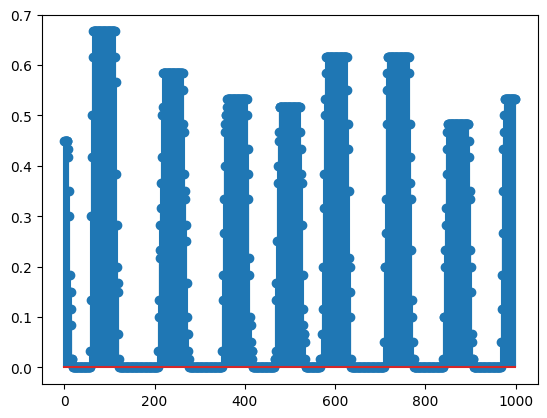

In [33]:
plt.stem(sync_rate[1000:2000])

<StemContainer object of 3 artists>

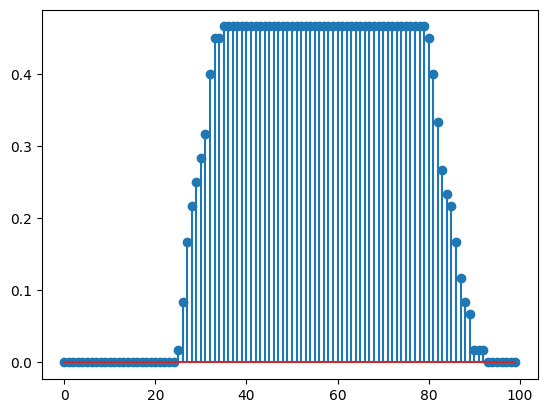

In [34]:
plt.stem(sync_rate[210:310])

In [35]:
# pairwise sync calculation
os.chdir(folder_path)

# number of nodes
nodes = 60

tau = 25

# with sampling rate of 0.1, 10000 entries will be there in between 1000 and 2000
final_mat = np.zeros(shape=(5000, nodes, nodes))

for i in range(0, nodes):
    for j in range(0, nodes):
        if(i == j):
            continue
        file_1 = f"dumbbell-{i+2}.cwnd"
        file_2 = f"dumbbell-{j+2}.cwnd"
        data_1 = np.genfromtxt(file_1, delimiter=8).reshape(-1, 2)
        data_2 = np.genfromtxt(file_2, delimiter=8).reshape(-1, 2)

        # after 1000 seconds
        # data_1 = data_1[9844:]
        # data_2 = data_2[9844:]
        
        if(len(data_1) != len(data_2)):
            print("data length not equal")
            break
            
        # convert into loss events
        sz = len(data_2)
        # hold loss events
        loss_1 = np.zeros(sz)
        loss_2 = np.zeros(sz)
        
        for t in range(1, sz-1):
            if(data_1[t][1] < data_1[t-1][1]):
                loss_1[t] = 1
            if(data_2[t][1] < data_2[t-1][1]):
                loss_2[t] = 1

        # total readings to do
        total = sz-1
        
        # calculate s_ij
        for k in range(tau, total-tau):
            ni = 0
            nj = 0
            nij = 0
            for l in range(k-tau, k+tau):
                if(loss_1[l] == 0 and loss_2[l] == 0):
                    continue
                if(loss_1[l] == 1 and loss_2[l] == 1):
                    nij += 1
                    ni += 1
                    nj += 1
                elif(loss_1[l] == 1 and loss_2[l] != 1):
                    ni += 1
                elif(loss_2[l] == 1 and loss_1[l] != 1):
                    nj += 1
            if(ni != 0 and nj != 0):
                final_mat[k][i][j] = max(nij/ni, nij/nj)
            elif(ni == 0 and nj != 0):
                final_mat[k][i][j] = nij/nj
            elif(ni != 0 and nj == 0):
                final_mat[k][i][j] = nij/ni

In [50]:
np_file_name = "/home/jack/github/mtp/pythonWork/temp_file"
np.save(np_file_name, final_mat)

In [53]:
final_mat = np.load(np_file_name+".npy")

In [43]:
l = []
for mat in final_mat:
    mat_norm = np.linalg.norm(mat)
    l.append(mat_norm)


In [44]:
l = np.array(l)
l = (l-np.min(l))/(np.max(l)-np.min(l))

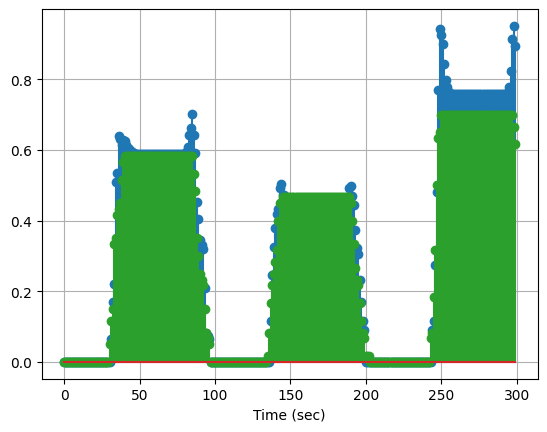

In [45]:
plt.stem(l[100:400])
plt.stem(sync_rate[100:400], linefmt='C2-', )
plt.xlabel("Time (sec)")
plt.grid()

let's say whenever sync rate is higher than 0.5 i am going go calculate beta
some problems
- how to find min and max points in a sliding window situation
- maybe for each flow calculate beta separately and average them

In [23]:
betas = []
for i in range(len(sync_rate)):
    sync = sync_rate[i]
    if(sync == 0):
        betas.append(0)
    else:
        # finding window
        low = max(0, i-window_size)
        high = min(i+window_size+1, len(data_loss[0]))

        # store only those flow numbers that are lossing packets
        flows_that_are_lossing = []
        
        for f in range(len(data_loss)):
            for j in range(low, high):
                if(data_loss[f][j] == 1):
                    flows_that_are_lossing.append(f)
                    break
        if(not flows_that_are_lossing):
            betas.append(0)
            continue;
        # extract the data
        loss_data = []
        for ff in flows_that_are_lossing:
            loss_data.append(data_to_n[ff][low:high])
        loss_data = np.array(loss_data)
        # calculate w* for those who are suffering loss
        w_star = np.average(loss_data, axis = 0)
        w_star = np.array(w_star)
        # first loss events
        fr = 0
        for i in range(1, len(w_star)):
            if(w_star[i] < w_star[i-1]):
                fr = w_star[i]
                break
        # last loss events
        lt = 0
        for i in range(len(w_star)-1, 0, -1):
            if(w_star[i] < w_star[i-1]):
                lt = w_star[i]
                break
        if(fr == 0):
            betas.append(0)
        else:
            beta = (fr-lt)/fr
            betas.append(beta)
        

<StemContainer object of 3 artists>

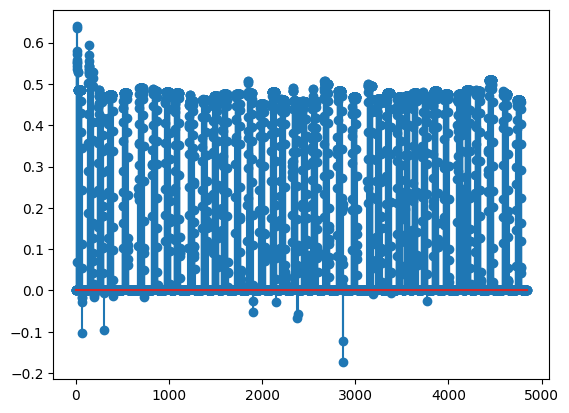

In [24]:
plt.stem(betas)

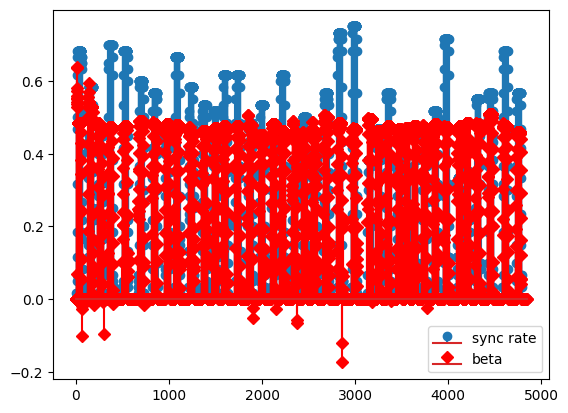

In [25]:
plt.stem(sync_rate, label='sync rate')
plt.stem(betas, linefmt='red', markerfmt='D', label='beta')
plt.legend()

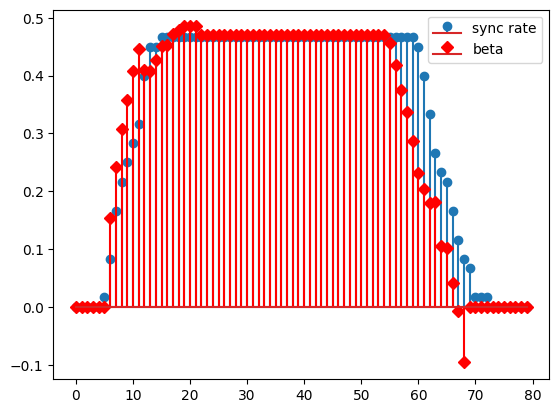

In [26]:
plt.stem(sync_rate[230:310], label='sync rate')
plt.stem(betas[230:310], linefmt='red', markerfmt='D', label='beta')
plt.legend()

In [27]:
# average beta over time
avg_beta = []
for b in betas:
    if(b > 0):
        if(not avg_beta):
            avg_beta.append(b)
        else:
            temp = len(avg_beta)*avg_beta[-1] + b
            avg_beta.append(temp/(len(avg_beta)+1))

In [29]:
avg_beta[-1]

np.float64(0.40550800020660394)

<StemContainer object of 3 artists>

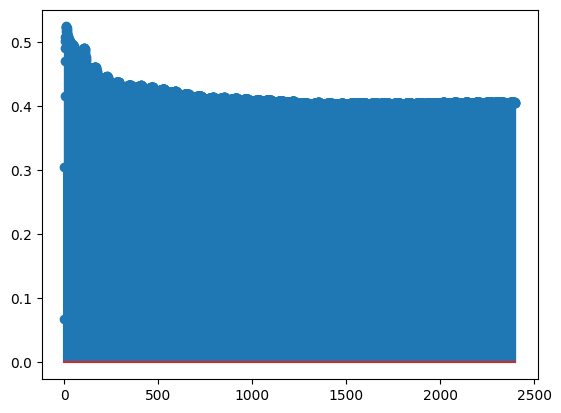

In [28]:
plt.stem(avg_beta)

## TODO:
- negative beta values?

# Queue size analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly

In [3]:
folder_path = "/home/jack/github/mtp/pythonWork/result-clientServerRouter-naqm/"

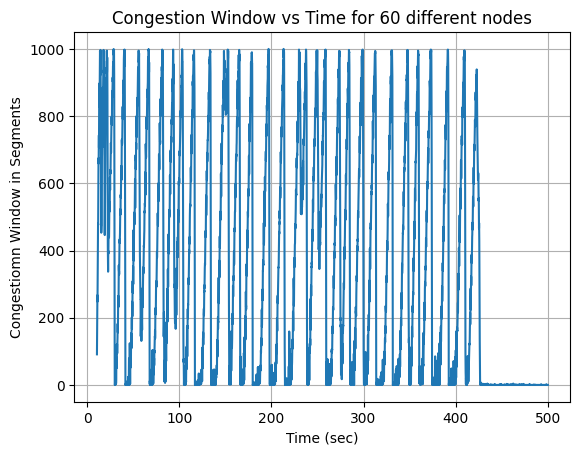

In [7]:
os.chdir(folder_path)

d = np.genfromtxt('tc-qsizeTrace-dumbbell.txt', delimiter=8).reshape(-1, 2)
# print()
plt.plot(d[:, 0], d[:, 1])
plt.xlabel("Time (sec)")
plt.ylabel("Congestiomn Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()

In [12]:
import plotly.express as px
fig = px.line(d[:,1])
fig.show()

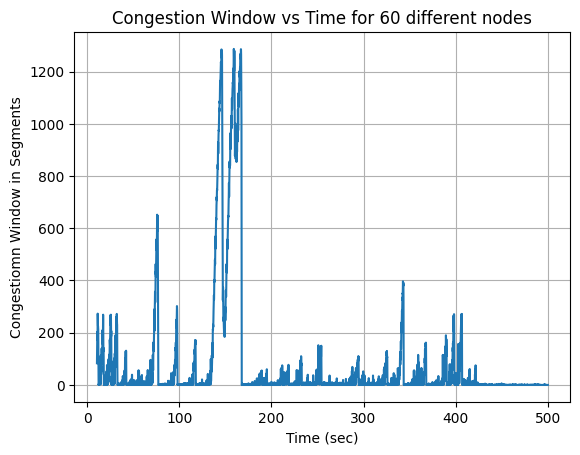

In [14]:
folder_path = "/home/jack/github/mtp/pythonWork/result-clientServerRouter-aqm/"
os.chdir(folder_path)

d = np.genfromtxt('tc-qsizeTrace-dumbbell.txt', delimiter=8).reshape(-1, 2)
# print()
plt.plot(d[:, 0], d[:, 1])
plt.xlabel("Time (sec)")
plt.ylabel("Congestiomn Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()

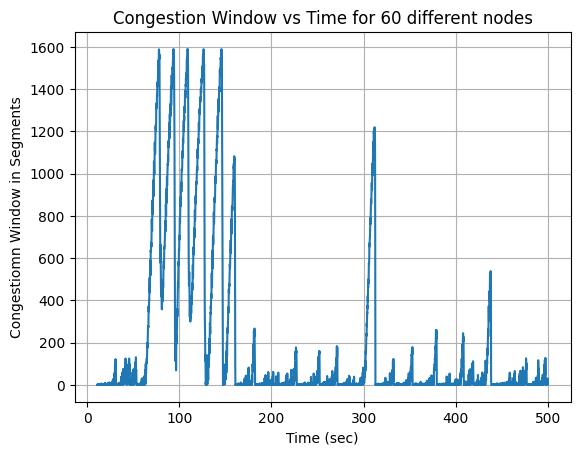

In [7]:
folder_path = "/home/jack/github/mtp/pythonWork/result-clientServerRouter-aqm1/"
os.chdir(folder_path)

d = np.genfromtxt('tc-qsizeTrace-dumbbell.txt', delimiter=8).reshape(-1, 2)
# print()
plt.plot(d[:, 0], d[:, 1])
plt.grid()
# plt.legend()

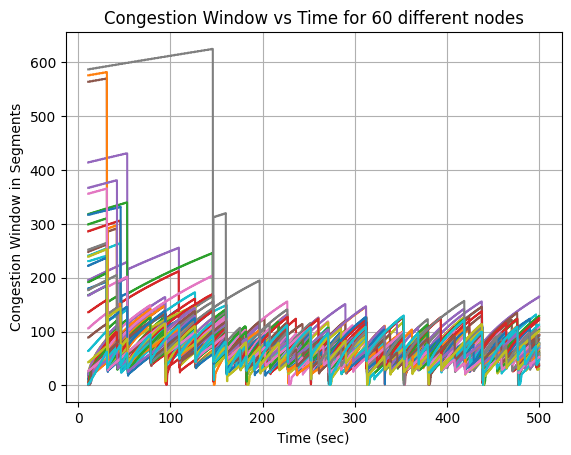

In [8]:
os.chdir(folder_path)
for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        plt.plot(d[:, 0], d[:, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()

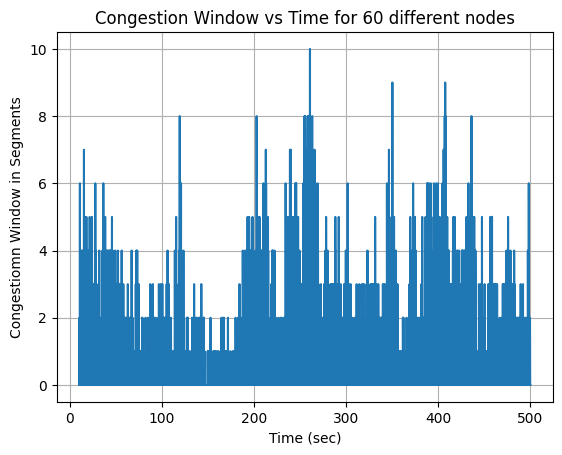

In [55]:
folder_path = "/home/jack/github/mtp/pythonWork/result-clientServerRouter-aqm3/"
os.chdir(folder_path)

d = np.genfromtxt('tc-qsizeTrace-dumbbell.txt', delimiter=8).reshape(-1, 2)
# print()
plt.plot(d[:, 0], d[:, 1])
plt.xlabel("Time (sec)")
plt.ylabel("Congestiomn Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()

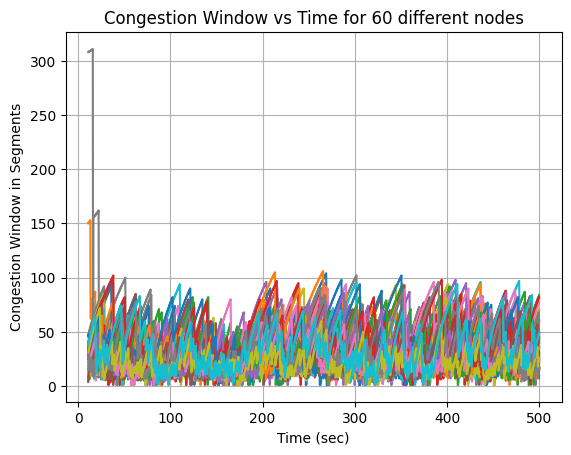

In [56]:
os.chdir(folder_path)
for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        plt.plot(d[:, 0], d[:, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()

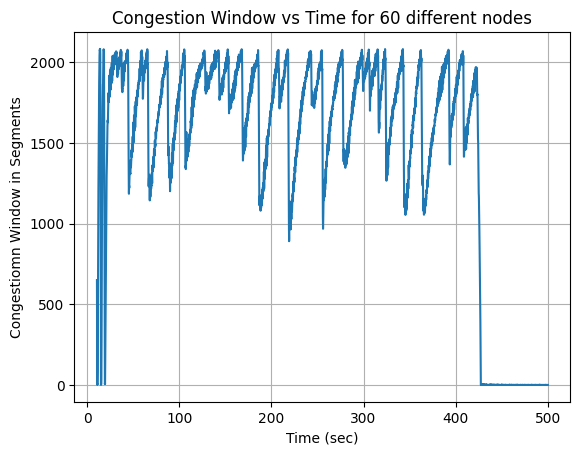

In [5]:
folder_path = "/home/jack/github/mtp/pythonWork/result-clientServerRouter-naqm1/"
os.chdir(folder_path)

d = np.genfromtxt('tc-qsizeTrace-dumbbell.txt', delimiter=8).reshape(-1, 2)
# print()
plt.plot(d[:, 0], d[:, 1])
plt.xlabel("Time (sec)")
plt.ylabel("Congestiomn Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()

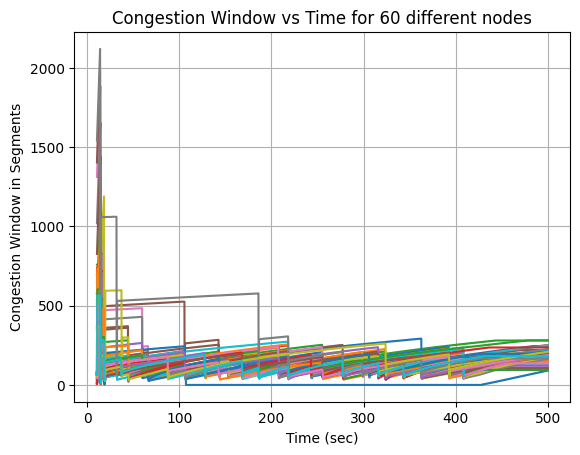

In [6]:
os.chdir(folder_path)
for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        plt.plot(d[:, 0], d[:, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()

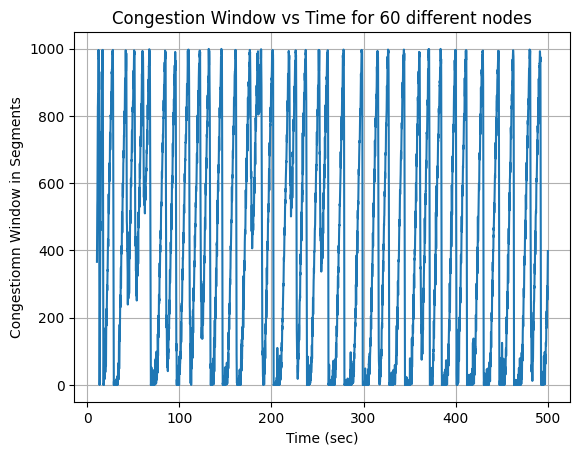

In [9]:
folder_path = "/home/jack/github/mtp/pythonWork/result-clientServerRouter-naqm2/"
os.chdir(folder_path)

d = np.genfromtxt('tc-qsizeTrace-dumbbell.txt', delimiter=8).reshape(-1, 2)
# print()
plt.plot(d[:, 0], d[:, 1])
plt.xlabel("Time (sec)")
plt.ylabel("Congestiomn Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()

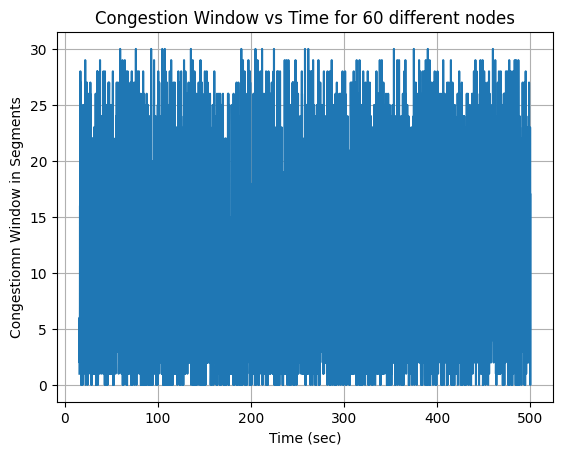

In [4]:
folder_path = "/home/jack/github/mtp/pythonWork/tcp-dumbbell-regular_q30/"
os.chdir(folder_path)

d = np.genfromtxt('qsizeTrace-dumbbell.txt', delimiter=8).reshape(-1, 2)
# print()
plt.plot(d[:, 0], d[:, 1])
plt.xlabel("Time (sec)")
plt.ylabel("Congestiomn Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()

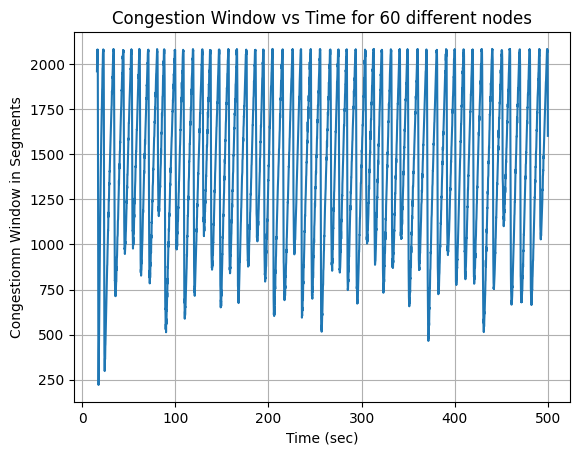

In [5]:
folder_path = "/home/jack/github/mtp/pythonWork/tcp-dumbbell-regular_q2084/"
os.chdir(folder_path)

d = np.genfromtxt('qsizeTrace-dumbbell.txt', delimiter=8).reshape(-1, 2)
# print()
plt.plot(d[:, 0], d[:, 1])
plt.xlabel("Time (sec)")
plt.ylabel("Congestiomn Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()